# EXPLORATORY DATA ANALYSIS (Haberman Dataset)

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
hm=pd.read_csv('haberman.csv',names=["age","op_year","axial_nodes","status"])
hm.loc[hm['status'] == 1, 'status'] = "more"
hm.loc[hm['status'] == 2, 'status'] = "less"
hm.head(10)

,age,op_year,axial_nodes,status
0,30,64,1,more
1,30,62,3,more
2,30,65,0,more
3,31,59,2,more
4,31,65,4,more
5,33,58,10,more
6,33,60,0,more
7,34,59,0,less
8,34,66,9,less
9,34,58,30,more


### 1.age= tells about the age of the person at the time of operation.
### 2.op_year= gives us the patient's year of operation.
### 3.axial_nodes = They are also known as Auxiliary lymph nodes whose function is to filter fluids before they are eventually released into the bloodstream. Having cancer cells in Nodes tells us that the cancer might have spread to other parts of body as well.
### 4.Status = this has two values 1 and 2.1 says that the patient ahs survived for more than 5 years while 2 says the patient survived less than 5 years.

## Statistical analysis

In [16]:
print(hm.shape)

(306, 4)


### There are a total of 306 data points and 4 features present in the dataset

In [17]:
print(hm.columns)

Index(['age', 'op_year', 'axial_nodes', 'status'], dtype='object')


In [18]:
hm["status"].value_counts()

more    225
less     81
Name: status, dtype: int64

In [19]:
hm.describe()

,age,op_year,axial_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


## Observation
### 1. This is an imbalanced dataset
### 2. There are 306 datapoints in the dataset.
### 3. This dataset has three inputs like age,year of operation,Axial nodes
### 4. There is one output with 2 target class label 1 and 2

# PDF

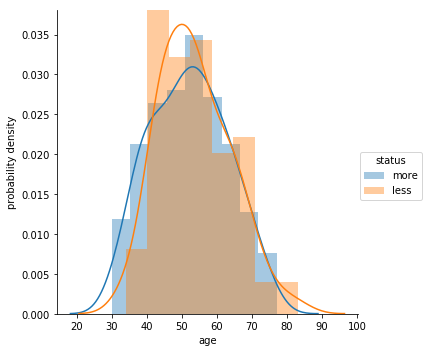

In [20]:
sns.FacetGrid(hm, hue="status", size=5).map(sns.distplot, "age", kde=True).add_legend();
plt.ylabel('probability density')
plt.show();

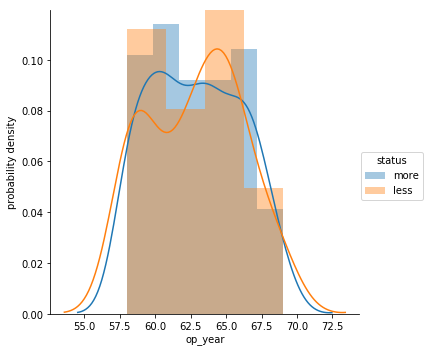

In [21]:
sns.FacetGrid(hm, hue="status", size=5).map(sns.distplot, "op_year").add_legend();
plt.ylabel('probability density')
plt.show();

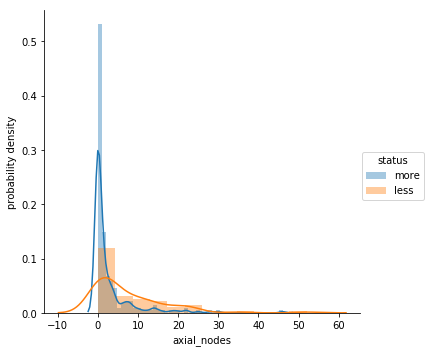

In [22]:
sns.FacetGrid(hm, hue="status", size=5).map(sns.distplot, "axial_nodes").add_legend();
plt.ylabel('probability density')
plt.show();

### Observations

### 1. From the histograms using three features we can say that age and op_year are not relevant to the classification.
 
### 2. The feature variable "node" is more relevant to the classification, so we can concentrate more on it.


# CDF

In [23]:
import numpy as np
status_1 = hm.loc[hm["status"] == "more"];
status_1.describe()


,age,op_year,axial_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


### Observations

1. the total number of class label for 'survived more than 5 years' is 225

In [24]:
status_2 = hm.loc[hm["status"] == "less"];
status_2.describe()

,age,op_year,axial_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations

1. the total number of class label for 'survived less than 5 years' is 81

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


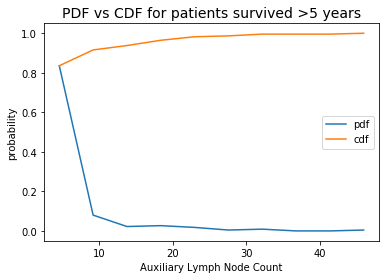

In [25]:
counts, bin_edges = np.histogram(status_1['axial_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf);
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:],cdf,label="cdf");
plt.xlabel('Auxiliary Lymph Node Count')
plt.ylabel('probability')

plt.title('PDF vs CDF for patients survived >5 years', size = 14)
plt.legend()

### Observations

### 1. there is 100% chance of low survival if the number of nodes are 40 and above.
### 2. there is 90% chance of survival if the number of nodes are 10 and less.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


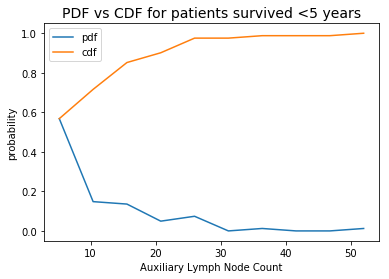

In [26]:
counts, bin_edges = np.histogram(status_2['axial_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf);
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:],cdf,label="cdf");
plt.xlabel('Auxiliary Lymph Node Count')
plt.ylabel('probability')

plt.title('PDF vs CDF for patients survived <5 years', size = 14)
plt.legend()

### Observations

### 1. 70% of the patients who survived has less than 10 nodes.
### 2. patients with more than 30 nodes had very low chance of survival.

# Box plot

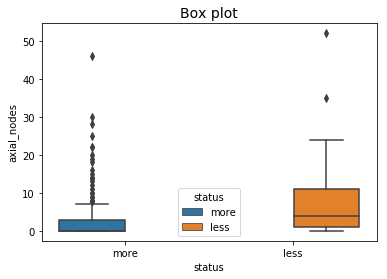

In [27]:
sns.boxplot(x="status",y="axial_nodes",data=hm,hue="status")
plt.title('Box plot', size = 14)
plt.show()

### Observation
### 1. there are more patients who have less than 5 nodes whose survived for more than 5 years.
### 2. there are more outliers present in the plot.

# Violin Plot

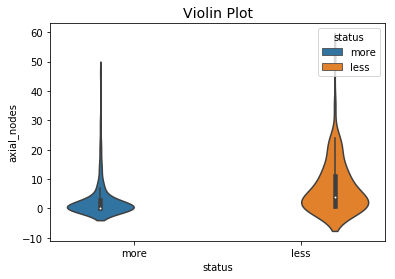

In [28]:
sns.violinplot(x="status",y="axial_nodes",data=hm,size=8,hue="status")
plt.title('Violin Plot', size = 14)
plt.show()

### Observations

### 1. Even a patient with 50 nodes have survived for more than 5 years.
### 2. Also patients with 0-10 nodes have not survived for more than 5 years.
### 3. But mainly patients with 0-10 nodes have mostly survived.

# 2D Scatter Plot

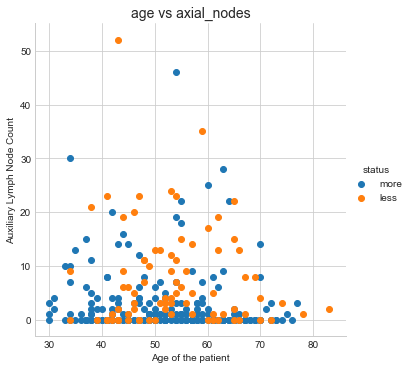

In [29]:
sns.set_style("whitegrid")
sns.FacetGrid(hm, hue = "status", size = 5)\
.map(plt.scatter, "age", "axial_nodes")\
.add_legend()
plt.ylabel('Auxiliary Lymph Node Count')
plt.xlabel('Age of the patient')
plt.title('age vs axial_nodes', size = 14)
plt.show()

## Observations

### 1. Maximum patients have 0-10 nodes.

### 2. Patients having ages between 40 and 60 have higher number of nodes.

### 3. this shows that hiogher number of axial nodes then higher the cancer spread to other parts of the body.

# Pair plots

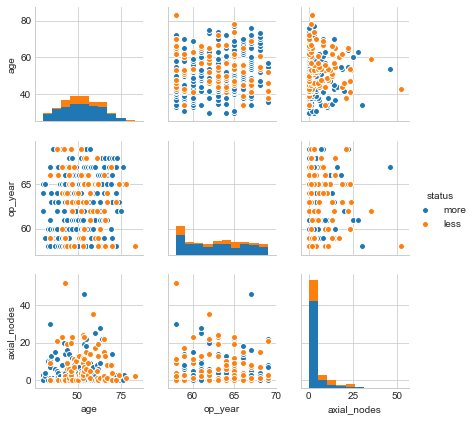

In [30]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hm, hue="status",size=2);
plt.show()

### 1. Pair plots are useful for exploring datasets where we have less number of features they give us insights to the underlying datasets by plotting features against one anaother in pairs.
### 2. The diagonal pair plots show the PDFs of the each feature in the dataset.
### 3. the plots 2,3,6 and 4,7,8 are mirrored along the diagonal of histogram.

# Count Plot

In [31]:
hm_1=hm.loc[hm["axial_nodes"]<=0]
hm_1.shape

(136, 4)

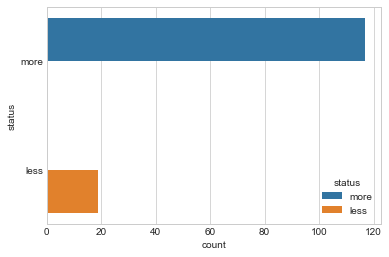

In [32]:
sns.countplot(y="status",data=hm_1,hue="status")
plt.show()

## Observations
### 1. if the number of patients who have '0' nodes are considered about 85 % of them survived for more than 5 years.

# Mean, Std, Median, Percentile, Quantile, MAD

In [33]:
print("STATUS 1:")

print("Means:")
print(np.mean(status_1["axial_nodes"]))

print("\nStd-dev:");
print(np.std(status_1["axial_nodes"]))

print("\nMedians:")
print(np.median(status_1["axial_nodes"]))

print("\nQuantiles:")
print(np.percentile(status_1["axial_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(status_1["axial_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status_1["axial_nodes"]))


STATUS 1:
Means:
2.7911111111111113

Std-dev:
5.857258449412131

Medians:
0.0

Quantiles:
[0. 0. 0. 3.]

90th Percentiles:
8.0

Median Absolute Deviation
0.0


In [34]:
print("STATUS 2:")

print("Means:")
print(np.mean(status_2["axial_nodes"]))

print("\nStd-dev:");
print(np.std(status_2["axial_nodes"]))

print("\nMedians:")
print(np.median(status_2["axial_nodes"]))

print("\nQuantiles:")
print(np.percentile(status_2["axial_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(status_2["axial_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status_2["axial_nodes"]))

STATUS 2:
Means:
7.45679012345679

Std-dev:
9.128776076761632

Medians:
4.0

Quantiles:
[ 0.  1.  4. 11.]

90th Percentiles:
20.0

Median Absolute Deviation
5.930408874022408


## Observations
### 1. The patients who survived longer have lesser nodes than those who survived lesser.
### 2. the median of nodes in patients who survived longer is '0' and median of nodes in patients who survived less is'4'.
### 3. at 90th% if the number of nodes detected is more than > 8 then there is a high survival chance and if the number of nodes detected is > 20 then there is a low survival chance